<a href="https://colab.research.google.com/github/SebastianLarssonDTU/02456-Reinforcement-Learning-Project/blob/restructure_code/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INIT : Procgen, Drive, Git

In [1]:
!pip install procgen

     |████████████████████████████████| 39.9MB 103kB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 22.2MB 1.5MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
     |████████████████████████████████| 204kB 40.0MB/s 
     |████████████████████████████████| 665kB 41.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [2]:
#Clone git
!git clone -b restructure_code https://github.com/SebastianLarssonDTU/02456-Reinforcement-Learning-Project.git "my_project"

Cloning into 'my_project'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 260 (delta 19), reused 14 (delta 0), pack-reused 223
Receiving objects: 100% (260/260), 1.10 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (152/152), done.


In [3]:
#update git
%cd /content/my_project
! git pull

/content/my_project
Already up to date.


In [4]:
import datatools as tools
from datatools import DATA_PATH, MODEL_PATH
#Mount drive
tools.mount_drive()

Mounted at /content/drive


# TESTING

In [5]:
#Import all custom files
import baseline
import datatools as tools
import hyperparameters as h
import model
import my_util
import policy
import ppo
import utils

#other imports
import torch

#import specific methods
from baseline import set_hyperparameters
from ppo import PPO
from experiments import run_experiment, print_list_of_experiments


In [6]:
print_list_of_experiments()

***** Experiment 0 *****
Description:    Baseline inspired by PPO article
***** Experiment 1 *****
Description:    Baseline inspired by Procgen article
***** Experiment 2 *****
Description:    Modified PPO baseline with value clipping enabled
***** Experiment 3 *****
Description:    Modified PPO baseline with value clipping enabled and learning rate given by par variable
***** Experiment 4 *****
Description:    Modified PPO baseline with value clipping enabled and reward penalty on death (1 as default)
***** Experiment 5 *****
Description:    Baseline inspired by IMPALA paper (No value clipping)
***** Experiment 6 *****
Description:    Inspired by IMPALA paper (With value clipping)
***** Experiment 7 *****
Description:    Inspired by both IMPALA and Procgen papers (With value clipping)


## Run experiments



In [7]:
INDEX = tools.create_index_table_from_txt_files()
INDEX

,total_steps,num_envs,num_levels,num_steps,num_epochs,batch_size,eps,grad_eps,value_coef,entropy_coef,lr,gamma,lmbda,version,time_limit,value_clipping,death_penalty,file_name,eval,eval_cycle,Time spent (in seconds),Steps taken,Done,penalty,Last Mean Reward
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment0,43200,False,False,Experiment0_Run_26Nov_15h21m41s,True,16,18858.62,8003584,False,NaN,20.34375
Value,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,0.999,0.95,Experiment1,43200,False,False,Experiment1_Run_26Nov_15h22m38s,True,16,19818.86,8003584,False,NaN,19.53125
Value,8000000.0,32,10,256,3,512,0.2,0.5,0.5,0.01,0.0005,0.999,0.95,Experiment2,43200,True,False,Experiment2_Run_26Nov_22h02m36s,True,16,20771.90,8003584,False,NaN,23.96875
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment2,43200,True,False,Experiment2_Run_27Nov_11h05m48s,True,16,20480.86,8003584,False,NaN,28.15625
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment4,43200,True,True,Experiment4_Run_27Nov_11h07m20s,True,16,20819.16,8003584,False,NaN,25.8125
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.0025,0.99,0.95,Experiment3,43200,True,False,Experiment3_Run_27Nov_18h03m39s,True,16,NaN,NaN,NaN,NaN,23.0
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,0.00025,0.99,0.95,Experiment4,43200,True,True,Experiment4_Run_27Nov_18h11m00s,True,16,NaN,NaN,NaN,3,24.5
Value,8000000.0,32,10,256,3,32,0.2,0.5,0.5,0.01,0.0006,0.99,0.95,Experiment5,43200,False,False,Experiment5_Run_27Nov_16h37m42s,True,16,32130.90,8003584,False,NaN,16.28125
Value,8000000.0,32,10,256,3,32,0.2,0.5,0.5,0.01,0.0006,0.99,0.95,Experiment6,43200,True,False,Experiment6_Run_28Nov_12h09m43s,True,16,34241.34,8003584,False,1,24.15625
Value,8000000.0,32,10,256,3,512,0.1,0.5,1,0.01,2.5e-05,0.99,0.95,Experiment3,43200,True,False,Experiment3_Run_29Nov_16h30m27s,True,16,NaN,NaN,NaN,1,22.03125


In [8]:
n=11

file_names = []
for i in range(n):
  file_names.append(INDEX['file_name'][-1-i].strip())

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_training_graphs(file_names):
  df = pd.DataFrame(columns=file_names)
  df['Step'] = pd.read_csv(DATA_PATH + INDEX["file_name"][0].strip()+".csv")["Step"]  #This only works as long as they all have the same steps!
  for file_name in file_names:
    df[file_name] = pd.read_csv(DATA_PATH + file_name+".csv")[" Mean reward"]
  
  df = df.set_index('Step')

  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  plt.title("Training")

def plot_eval_graphs(file_names):
  df = pd.DataFrame(columns=file_names)
  for file_name in file_names:
    temp = pd.read_csv(DATA_PATH + file_name+"_EVAL.csv")
    df[file_name] = temp["avg"]
  plt.figure(figsize=(16, 10))
  sns.lineplot(data = df)
  plt.title("Eval")
  return df

In [79]:
for i in range(len(file_names)):
  print("[{}] : {}".format(i, file_names[i]))

[0] : Experiment7_Run_29Nov_16h32m47s
[1] : Experiment3_Run_29Nov_16h30m27s
[2] : Experiment6_Run_28Nov_12h09m43s
[3] : Experiment5_Run_27Nov_16h37m42s
[4] : Experiment4_Run_27Nov_18h11m00s
[5] : Experiment3_Run_27Nov_18h03m39s
[6] : Experiment4_Run_27Nov_11h07m20s
[7] : Experiment2_Run_27Nov_11h05m48s
[8] : Experiment2_Run_26Nov_22h02m36s
[9] : Experiment1_Run_26Nov_15h22m38s
[10] : Experiment0_Run_26Nov_15h21m41s


In [80]:
chosen = [10,3,2,0]
chosen_files=[file_names[i] for i in chosen]

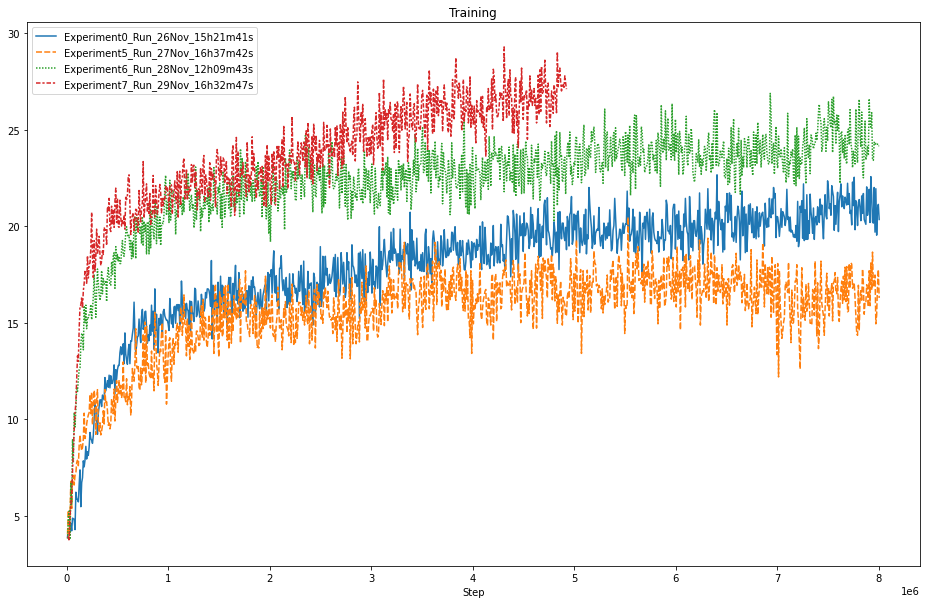

In [81]:
plot_training_graphs(chosen_files)

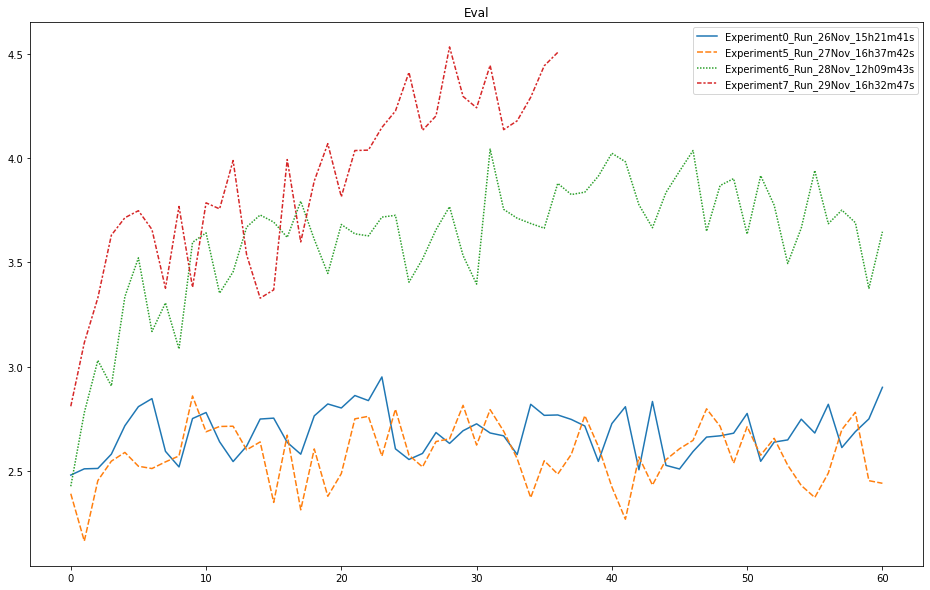

In [82]:
df= plot_eval_graphs(chosen_files)

In [72]:
df

,Experiment0_Run_26Nov_15h21m41s,Experiment5_Run_27Nov_16h37m42s,Experiment6_Run_28Nov_12h09m43s,Experiment7_Run_29Nov_16h32m47s
0,2.480169,2.390729,2.426551,2.810205
1,2.510100,2.163443,2.779882,3.115139
2,2.511959,2.453571,3.030240,3.330232
3,2.580584,2.547052,2.907806,3.631029
4,2.716989,2.588864,3.336232,3.714778
...,...,...,...,...
56,2.819726,2.489693,3.685955,NaN
57,2.612106,2.698081,3.751435,NaN
58,2.688360,2.781314,3.690966,NaN
59,2.749573,2.453294,3.376017,NaN
